In [ ]:
Taller: Análisis Exploratorio de Datos (EDA) con Dataset de Películas

Objetivo:
En este taller, realizaremos un análisis exploratorio de datos (EDA) usando un dataset de películas. Aplicaremos lo que hemos aprendido sobre la manipulación de datos y visualización para obtener insights importantes del conjunto de datos.

Instrucciones:

#Seleccionar un problema e identificar un objetivo

"""
Una pelicula comercial por lo general entretiene al publico y genera grandes
ingresos en taquillas para las compañias cinematograficas. Hay diferentes
factores que garantizan el éxito, por ejemplo, grandes directores y actores.
Sin embargo, ha sucedido que peliculas con grandes actores y directores no han
tenido el éxito esperado en cuanto a taquilla y calificación IMDB.

Basandonos en una base de datos con diferente información relacionada a peliculas
queremos comprender los factores más importantes que determinan el éxito de una
pelicula.Por lo tant, analizaremos que genero de peliculas es mas exitosos,
en pocas palabras cuales tienen la calificación IMDB más alta.

IMDB_Score    Calificación
1-3           Mala
3-6           Aceptable
6-8           Buena
8-10          Muy buena

"""


In [ ]:
# 1. Carga del Dataset:
# Carga el dataset proporcionado sobre películas en un DataFrame de pandas.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/movie_metadata.csv')

In [ ]:
# 2. Revisión General de los Datos:

# Imprime las primeras 5 filas del dataset.

dataset.head()

# Usa .info() y .describe() para entender mejor la estructura y las estadísticas básicas.

dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
dataset.shape

NameError: name 'dataset' is not defined

In [ ]:
# 3. Búsqueda y Eliminación de Duplicados:

# Verifica si hay filas duplicadas en el dataset utilizando el método .duplicated().

duplicados = dataset.duplicated().sum()

print("Hay" , duplicados, " datos duplicados.")



Hay 45  datos duplicados.


In [ ]:
# Si se encuentran duplicados, elimínalos con .drop_duplicates() y verifica cuántos duplicados fueron eliminados.

dataset_limpio = dataset.drop_duplicates
print("Se eliminaron", duplicados, "duplicados.")




Se eliminaron 45 duplicados.


In [ ]:
# 4. Identificación de Valores Nulos:

dataset.isnull().sum()

# Identifica qué columnas tienen valores nulos y cuántos valores nulos hay en cada columna.

,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [ ]:
type(dataset_limpio)

method

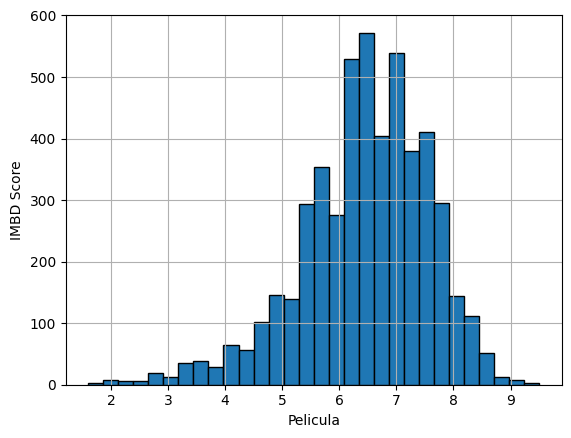

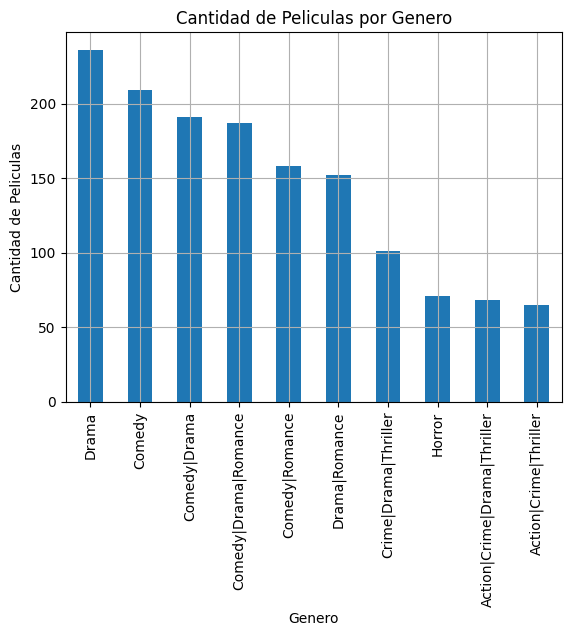

In [ ]:
# 5. Visualización de Variables:

import matplotlib.pyplot as plt
import seaborn as sns

# Crea un histograma que muestre la distribución de la variable imdb_score.

plt.hist(dataset['imdb_score'], bins=30, edgecolor='black')
plt.xlabel('Pelicula')
plt.ylabel('IMBD Score')
plt.grid(True)
plt.show()


# Realiza un gráfico de barras para visualizar la cantidad de películas por género (genres).

dataset['genres'].value_counts().head(10).plot(kind='bar')
plt.title('Cantidad de Peliculas por Genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad de Peliculas')
plt.grid(True)
plt.show()


In [ ]:
# 6. Análisis de Correlaciones:

# Calcula y muestra la correlación entre budget, gross y imdb_score.



# Usa un mapa de calor para visualizar las correlaciones.

In [ ]:
# 7. Gráficos de Dispersión:

# Crea un gráfico de dispersión para analizar la relación entre budget y gross.
# Haz un gráfico de dispersión entre imdb_score y budget.

Entregables Misión 1
1. Código completo del EDA en un archivo Jupyter Notebook. Incluir el dataset que quedó como resultado de la limpieza.
2. Gráficas generadas (histogramas, gráficos de barras, gráficos de dispersión, mapa de calor).
3. Un resumen de las conclusiones obtenidas, basado en las visualizaciones y análisis de correlaciones realizados.